# SAME FILE WITH 8- Customer churn prediction using ANN.ipynb

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("./dataset/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df1 = df.drop(["RowNumber", "CustomerId", "Surname"],axis=1)
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
 df1["Gender"].replace({'Female': 1,'Male': 0}, inplace=True)

In [6]:
df1.rename({"Gender":"Female"}, axis=1, inplace=True)
df1

,CreditScore,Geography,Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df1.describe()

,CreditScore,Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df1.agg(["min", "max"])

,CreditScore,Geography,Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
min,350,France,0,18,0,0.00,1,0,0,11.58,0
max,850,Spain,1,92,10,250898.09,4,1,1,199992.48,1


In [9]:
df1.Exited.unique()

array([1, 0], dtype=int64)

In [10]:
df2 = pd.get_dummies(data=df1, columns=["Geography"],drop_first=True)

In [11]:
df2

,CreditScore,Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,False,False
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,709,1,36,7,0.00,1,0,1,42085.58,1,False,False
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,True,False


In [12]:
df2.dtypes

CreditScore            int64
Female                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[["CreditScore", "Age", "Balance", "EstimatedSalary"]] = scaler.fit_transform(df2[["CreditScore", "Age", "Balance", "EstimatedSalary"]])

In [14]:
df2

,CreditScore,Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,2,0.000000,1,1,1,0.506735,1,False,False
1,0.516,1,0.310811,1,0.334031,1,0,1,0.562709,0,False,True
2,0.304,1,0.324324,8,0.636357,3,1,0,0.569654,1,False,False
3,0.698,1,0.283784,1,0.000000,2,0,0,0.469120,0,False,False
4,1.000,1,0.337838,2,0.500246,1,1,1,0.395400,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,5,0.000000,2,1,0,0.481341,0,False,False
9996,0.332,0,0.229730,10,0.228657,1,1,1,0.508490,0,False,False
9997,0.718,1,0.243243,7,0.000000,1,0,1,0.210390,1,False,False
9998,0.844,0,0.324324,3,0.299226,2,1,0,0.464429,1,True,False


In [15]:
df2[["Tenure"]] = scaler.fit_transform(df2[["Tenure"]])

In [16]:
df2

,CreditScore,Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,1,1,1,0.506735,1,False,False
1,0.516,1,0.310811,0.1,0.334031,1,0,1,0.562709,0,False,True
2,0.304,1,0.324324,0.8,0.636357,3,1,0,0.569654,1,False,False
3,0.698,1,0.283784,0.1,0.000000,2,0,0,0.469120,0,False,False
4,1.000,1,0.337838,0.2,0.500246,1,1,1,0.395400,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,2,1,0,0.481341,0,False,False
9996,0.332,0,0.229730,1.0,0.228657,1,1,1,0.508490,0,False,False
9997,0.718,1,0.243243,0.7,0.000000,1,0,1,0.210390,1,False,False
9998,0.844,0,0.324324,0.3,0.299226,2,1,0,0.464429,1,True,False


In [17]:
X = df2.drop(["Exited"], axis=1)
y = df2["Exited"]
X,y

(      CreditScore  Female       Age  Tenure   Balance  NumOfProducts   
 0           0.538       1  0.324324     0.2  0.000000              1  \
 1           0.516       1  0.310811     0.1  0.334031              1   
 2           0.304       1  0.324324     0.8  0.636357              3   
 3           0.698       1  0.283784     0.1  0.000000              2   
 4           1.000       1  0.337838     0.2  0.500246              1   
 ...           ...     ...       ...     ...       ...            ...   
 9995        0.842       0  0.283784     0.5  0.000000              2   
 9996        0.332       0  0.229730     1.0  0.228657              1   
 9997        0.718       1  0.243243     0.7  0.000000              1   
 9998        0.844       0  0.324324     0.3  0.299226              2   
 9999        0.884       1  0.135135     0.4  0.518708              1   
 
       HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany   
 0             1               1         0.506735 

# *************************

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [19]:
X_train.shape

(8000, 11)

In [20]:
X_test.shape

(2000, 11)

In [21]:
X_train.dtypes

CreditScore          float64
Female                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [22]:
X_test.dtypes

CreditScore          float64
Female                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [23]:
float_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
cols=["Geography_Germany", "Geography_Spain"]
X_train[float_cols] = X_train[float_cols].values.astype(np.float32)
X_train[float_cols] = tf.convert_to_tensor(X_train[float_cols], dtype=tf.float32)
X_train[cols] = X_train[cols].replace({False:0, True:1})

X_test[float_cols] = X_test[float_cols].values.astype(np.float32)
X_test[float_cols] = tf.convert_to_tensor(X_test[float_cols], dtype=tf.float32)
X_test[cols] = X_test[cols].replace({False:0, True:1})


In [24]:
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [25]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5074 - accuracy: 0.7935
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7993
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.8021
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.8046
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8100
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8154
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8234
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8267
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8307
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3858 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.8625
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3360 - accuracy: 0.8656
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.8649
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 0.8618
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.8629
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8614
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8627
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8633
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8619
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 

In [26]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8515


[0.3535892367362976, 0.8514999747276306]

In [27]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 871us/step


array([[0.02475526],
       [0.0460942 ],
       [0.08009254],
       [0.09215315],
       [0.07199851]], dtype=float32)

In [28]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [29]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [30]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.72      0.43      0.54       405

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

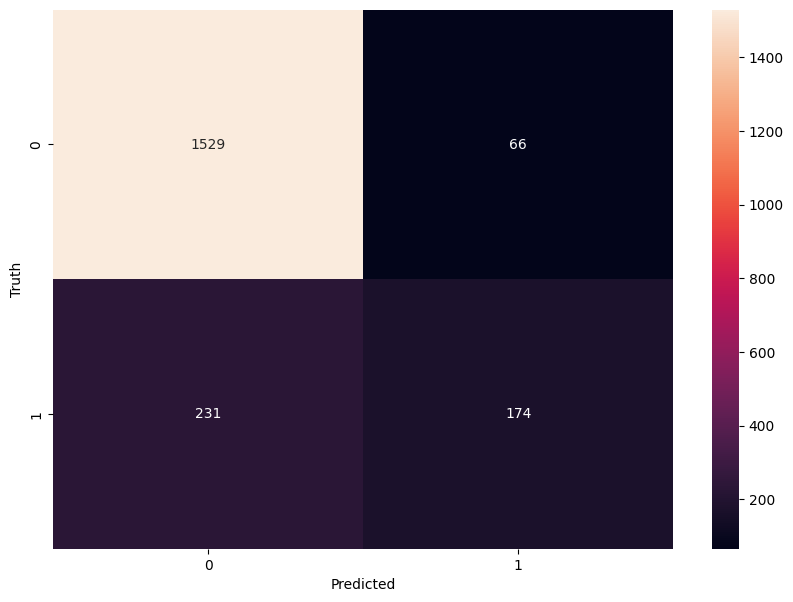

In [32]:
import matplotlib.pyplot as plt
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy

In [33]:
round((1509+197)/(1509+197+86+208),2)

0.85

Precision for 0 class. i.e. Precision for customers who did not exit

In [34]:
round(1509/(1509+208),2)

0.88

Precision for 1 class. i.e. Precision for customers who actually churned

In [35]:
round(197/(197+86),2)

0.7

Recall for 0 class

In [36]:
round(1509/(1509+86),2)

0.95

Recall for 1 class

In [37]:
round(197/(197+208),2)

0.49

In [38]:
model2 = keras.Sequential([
    keras.layers.Dense(5, input_shape=(11,), activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7915
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.8012
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.8090
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.8100
Epoch 5/100
250/250 [==============================] - 0s 964us/step - loss: 0.4442 - accuracy: 0.8127
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.8130
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8139
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8150
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8164
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4269 - accu

250/250 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8525
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8533
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8537
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8529
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8536
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8535
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8540
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8560
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8556
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 

In [39]:
model2.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8475


[0.3637291491031647, 0.8475000262260437]

In [40]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8515


[0.3535892367362976, 0.8514999747276306]

# 10- Handling imbalanced dataset in machine learning.ipynb

# Method 1: Undersampling

In [41]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [42]:
y_test.value_counts()

Exited
0    1595
1     405
Name: count, dtype: int64

In [43]:
count_class0, count_class1 = df2.Exited.value_counts()

df_class_0 = df2[df2["Exited"] == 0]
df_class_1 = df2[df2["Exited"] == 1]

In [44]:
df_class_0.shape

(7963, 12)

In [45]:
df_class_1.shape

(2037, 12)

In [46]:
df_class_0_under = df_class_0.sample(count_class1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under

,CreditScore,Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
2646,0.150,1,0.283784,0.5,0.000000,2,1,0,0.704717,0,False,True
9944,0.788,0,0.310811,0.7,0.758911,2,1,1,0.691816,0,True,False
5274,0.544,0,0.337838,0.8,0.000000,2,1,0,0.503081,0,False,False
6331,0.558,0,0.229730,0.8,0.447715,1,1,1,0.454991,0,True,False
7873,0.864,0,0.243243,0.5,0.323680,2,0,1,0.540011,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,0,0.324324,0.3,0.605982,1,1,1,0.267193,1,True,False
9982,0.610,1,0.378378,0.7,0.546617,1,1,0,0.575729,1,True,False
9991,0.494,1,0.472973,0.4,0.352259,1,1,0,0.346899,1,False,False
9997,0.718,1,0.243243,0.7,0.000000,1,0,1,0.210390,1,False,False


In [47]:
count_class1*2

4074

In [48]:
df_test_under.Exited.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [49]:
X = df_test_under.drop(["Exited"], axis=1)
y = df_test_under["Exited"]
X,y

(      CreditScore  Female       Age  Tenure   Balance  NumOfProducts   
 2646        0.150       1  0.283784     0.5  0.000000              2  \
 9944        0.788       0  0.310811     0.7  0.758911              2   
 5274        0.544       0  0.337838     0.8  0.000000              2   
 6331        0.558       0  0.229730     0.8  0.447715              1   
 7873        0.864       0  0.243243     0.5  0.323680              2   
 ...           ...     ...       ...     ...       ...            ...   
 9981        0.296       0  0.324324     0.3  0.605982              1   
 9982        0.610       1  0.378378     0.7  0.546617              1   
 9991        0.494       1  0.472973     0.4  0.352259              1   
 9997        0.718       1  0.243243     0.7  0.000000              1   
 9998        0.844       0  0.324324     0.3  0.299226              2   
 
       HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany   
 2646          1               0         0.704717 

### stratify will equal 0 and 1 for train and test

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [51]:
y_train.value_counts()

Exited
1    1630
0    1629
Name: count, dtype: int64

In [58]:
X_train.dtypes

CreditScore          float64
Female                 int64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [59]:
float_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
cols=["Geography_Germany", "Geography_Spain"]
X_train[float_cols] = X_train[float_cols].values.astype(np.float32)
X_train[float_cols] = tf.convert_to_tensor(X_train[float_cols], dtype=tf.float32)
X_train[cols] = X_train[cols].replace({False:0, True:1})

X_test[float_cols] = X_test[float_cols].values.astype(np.float32)
X_test[float_cols] = tf.convert_to_tensor(X_test[float_cols], dtype=tf.float32)
X_test[cols] = X_test[cols].replace({False:0, True:1})

In [60]:
X_train.dtypes

CreditScore          float32
Female                 int64
Age                  float32
Tenure               float32
Balance              float32
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float32
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [61]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(11, input_dim=11, activation='relu'),
        keras.layers.Dense(4, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [62]:
y_preds = ANN(X_train,y_train,X_test,y_test, "binary_crossentropy", -1)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 0.6853 - accuracy: 0.5443
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.6109
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6444
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6407 - accuracy: 0.6582
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.6582
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.6523
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.6609
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.6634
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6118 - accuracy: 0.6720
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6079 - accura

102/102 [==============================] - 0s 1ms/step - loss: 0.4846 - accuracy: 0.7591
Epoch 82/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7613
Epoch 83/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.7588
Epoch 84/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7604
Epoch 85/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7567
Epoch 86/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7594
Epoch 87/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7622
Epoch 88/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7579
Epoch 89/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4846 - accuracy: 0.7564
Epoch 90/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 

# Method2: Oversampling

In [63]:
count_class0, count_class1

(7963, 2037)

In [68]:
df_class_1_over = df_class_1.sample(count_class0, replace=True)
df_class_1_over

,CreditScore,Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
3146,0.396,1,0.135135,0.8,0.465350,2,1,1,0.792944,1,False,False
2236,0.564,0,0.310811,0.3,0.504391,1,0,0,0.888250,1,True,False
9494,0.878,0,0.337838,0.8,0.476905,2,0,1,0.742074,1,True,False
4834,0.804,1,0.229730,0.2,0.000000,1,1,0,0.221641,1,False,True
3303,0.564,1,0.351351,0.3,0.533260,1,1,1,0.172994,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3245,0.328,1,0.364865,0.3,0.434568,1,0,1,0.777052,1,True,False
1505,0.512,0,0.405405,0.4,0.527718,1,0,0,0.180419,1,True,False
2168,0.710,1,0.513514,0.2,0.570948,1,1,0,0.442126,1,True,False
1657,0.708,1,0.486486,0.6,0.532714,3,1,0,0.725368,1,True,False


In [70]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over

,CreditScore,Female,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
1,0.516,1,0.310811,0.1,0.334031,1,0,1,0.562709,0,False,True
3,0.698,1,0.283784,0.1,0.000000,2,0,0,0.469120,0,False,False
4,1.000,1,0.337838,0.2,0.500246,1,1,1,0.395400,0,False,True
6,0.944,0,0.432432,0.7,0.000000,2,1,1,0.050261,0,False,False
8,0.302,0,0.351351,0.4,0.566170,2,0,1,0.374680,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3245,0.328,1,0.364865,0.3,0.434568,1,0,1,0.777052,1,True,False
1505,0.512,0,0.405405,0.4,0.527718,1,0,0,0.180419,1,True,False
2168,0.710,1,0.513514,0.2,0.570948,1,1,0,0.442126,1,True,False
1657,0.708,1,0.486486,0.6,0.532714,3,1,0,0.725368,1,True,False


In [71]:
count_class0*2

15926

In [72]:
df_test_over.Exited.value_counts()

Exited
0    7963
1    7963
Name: count, dtype: int64

In [73]:
X = df_test_over.drop(["Exited"], axis=1)
y = df_test_over["Exited"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [76]:
y_train.value_counts(), y_test.value_counts()

(Exited
 1    6370
 0    6370
 Name: count, dtype: int64,
 Exited
 0    1593
 1    1593
 Name: count, dtype: int64)

In [78]:
float_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
cols=["Geography_Germany", "Geography_Spain"]
X_train[float_cols] = X_train[float_cols].values.astype(np.float32)
X_train[float_cols] = tf.convert_to_tensor(X_train[float_cols], dtype=tf.float32)
X_train[cols] = X_train[cols].replace({False:0, True:1})

X_test[float_cols] = X_test[float_cols].values.astype(np.float32)
X_test[float_cols] = tf.convert_to_tensor(X_test[float_cols], dtype=tf.float32)
X_test[cols] = X_test[cols].replace({False:0, True:1})

In [79]:
y_preds = ANN(X_train,y_train,X_test,y_test, "binary_crossentropy", -1)

Epoch 1/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6619 - accuracy: 0.6246
Epoch 2/100
399/399 [==============================] - 0s 1ms/step - loss: 0.6347 - accuracy: 0.6574
Epoch 3/100
399/399 [==============================] - 0s 1ms/step - loss: 0.6086 - accuracy: 0.6867
Epoch 4/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5837 - accuracy: 0.7043
Epoch 5/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5628 - accuracy: 0.7182
Epoch 6/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7264
Epoch 7/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5442 - accuracy: 0.7359
Epoch 8/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5332 - accuracy: 0.7427
Epoch 9/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.7486
Epoch 10/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5136 - accura

399/399 [==============================] - 1s 1ms/step - loss: 0.4518 - accuracy: 0.7836
Epoch 82/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4516 - accuracy: 0.7825
Epoch 83/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4509 - accuracy: 0.7820
Epoch 84/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.7838
Epoch 85/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4504 - accuracy: 0.7841
Epoch 86/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4508 - accuracy: 0.7839
Epoch 87/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.7821
Epoch 88/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.7827
Epoch 89/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4497 - accuracy: 0.7821
Epoch 90/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4512 - accuracy: 

# Method3: SMOTE

In [81]:
# %pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ------------------ ------------------- 112.6/235.6 kB 726.2 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/235.6 kB 722.1 kB/s eta 0:00:01
   ---------------------------- --------- 174.1/235.6 kB 697.2 kB/s eta 0:00:01
   --------------------------------- ---- 204.8/235.6 kB 692.4 kB/s eta 0:00:01
   -------------------------------------  235.5/235.6 kB 686.8 kB/s eta 0:00:01
   -------------------------------------- 235.6/235.6 kB 687.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [82]:
X = df2.drop(["Exited"], axis=1)
y = df2["Exited"]

In [83]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [87]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=0, stratify=y_sm)

In [91]:
y_train.value_counts(), y_test.value_counts()

(Exited
 1    6370
 0    6370
 Name: count, dtype: int64,
 Exited
 0    1593
 1    1593
 Name: count, dtype: int64)

In [93]:
float_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
cols=["Geography_Germany", "Geography_Spain"]
X_train[float_cols] = X_train[float_cols].values.astype(np.float32)
X_train[float_cols] = tf.convert_to_tensor(X_train[float_cols], dtype=tf.float32)
X_train[cols] = X_train[cols].replace({False:0, True:1})

X_test[float_cols] = X_test[float_cols].values.astype(np.float32)
X_test[float_cols] = tf.convert_to_tensor(X_test[float_cols], dtype=tf.float32)
X_test[cols] = X_test[cols].replace({False:0, True:1})

In [94]:
y_preds = ANN(X_train,y_train,X_test,y_test, "binary_crossentropy", -1)

Epoch 1/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6783 - accuracy: 0.5989
Epoch 2/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6412 - accuracy: 0.6557
Epoch 3/100
399/399 [==============================] - 0s 1ms/step - loss: 0.6063 - accuracy: 0.6983
Epoch 4/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5749 - accuracy: 0.7232
Epoch 5/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7363
Epoch 6/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5374 - accuracy: 0.7433
Epoch 7/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5257 - accuracy: 0.7531
Epoch 8/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5164 - accuracy: 0.7553
Epoch 9/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5090 - accuracy: 0.7599
Epoch 10/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5024 - accura

399/399 [==============================] - 1s 2ms/step - loss: 0.4324 - accuracy: 0.7927
Epoch 82/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4320 - accuracy: 0.7927
Epoch 83/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.7951
Epoch 84/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.7946
Epoch 85/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4315 - accuracy: 0.7943
Epoch 86/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.7940
Epoch 87/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.7947
Epoch 88/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.7957
Epoch 89/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.7947
Epoch 90/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 

# Method4: Use of Ensemble with undersampling

In [95]:
X = df2.drop(["Exited"], axis=1)
y = df2["Exited"]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [111]:
float_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
cols=["Geography_Germany", "Geography_Spain"]
X_train[float_cols] = X_train[float_cols].values.astype(np.float32)
X_train[float_cols] = tf.convert_to_tensor(X_train[float_cols], dtype=tf.float32)
X_train[cols] = X_train[cols].replace({False:0, True:1})

X_test[float_cols] = X_test[float_cols].values.astype(np.float32)
X_test[float_cols] = tf.convert_to_tensor(X_test[float_cols], dtype=tf.float32)
X_test[cols] = X_test[cols].replace({False:0, True:1})

In [112]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [113]:
6370/1630

3.9079754601226995

In [114]:
df3 = X_train.copy()
df3['Exited'] = y_train

In [115]:
df3_class0 = df3[df3.Exited==0]
df3_class1 = df3[df3.Exited==1]

In [121]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train

In [124]:
arr = [[0,1630],[1630,3260],[3260,4890],[4890,6370]]
predictions = []
for i in arr:
    X_train, y_train = get_train_batch(df3_class0, df3_class1, i[0], i[1])
    
    X_train[float_cols] = X_train[float_cols].values.astype(np.float32)
    X_train[float_cols] = tf.convert_to_tensor(X_train[float_cols], dtype=tf.float32)
    X_train[cols] = X_train[cols].replace({False:0, True:1})
    y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)
    predictions.append(y_pred)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 0.6783 - accuracy: 0.5865
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.6433
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.6528
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6277 - accuracy: 0.6549
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6187 - accuracy: 0.6663
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.6733
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.6798
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5978 - accuracy: 0.6816
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5895 - accuracy: 0.6908
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5836 - accura

102/102 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7748
Epoch 82/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.7773
Epoch 83/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.7739
Epoch 84/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.7742
Epoch 85/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.7752
Epoch 86/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7776
Epoch 87/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7770
Epoch 88/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.7755
Epoch 89/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.7742
Epoch 90/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 

102/102 [==============================] - 0s 1ms/step - loss: 0.4971 - accuracy: 0.7650
Epoch 57/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.7647
Epoch 58/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7699
Epoch 59/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4932 - accuracy: 0.7702
Epoch 60/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.7687
Epoch 61/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.7693
Epoch 62/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.7706
Epoch 63/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7709
Epoch 64/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.7702
Epoch 65/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4887 - accuracy: 

102/102 [==============================] - 0s 1ms/step - loss: 0.5144 - accuracy: 0.7617
Epoch 32/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5125 - accuracy: 0.7589
Epoch 33/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.7580
Epoch 34/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.7635
Epoch 35/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.7626
Epoch 36/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7595
Epoch 37/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7638
Epoch 38/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5008 - accuracy: 0.7620
Epoch 39/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.7644
Epoch 40/100
102/102 [==============================] - 0s 1ms/step - loss: 0.4976 - accuracy: 

98/98 [==============================] - 0s 1ms/step - loss: 0.6154 - accuracy: 0.6711
Epoch 7/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6046 - accuracy: 0.6875
Epoch 8/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5952 - accuracy: 0.6920
Epoch 9/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5868 - accuracy: 0.6887
Epoch 10/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.7061
Epoch 11/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.7080
Epoch 12/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.7074
Epoch 13/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.7141
Epoch 14/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5483 - accuracy: 0.7209
Epoch 15/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.7164
Epoch 16/100
98/

98/98 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.7624
Epoch 89/100
98/98 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.7640
Epoch 90/100
98/98 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7666
Epoch 91/100
98/98 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.7669
Epoch 92/100
98/98 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.7621
Epoch 93/100
98/98 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7659
Epoch 94/100
98/98 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.7646
Epoch 95/100
98/98 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.7656
Epoch 96/100
98/98 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.7666
Epoch 97/100
98/98 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7627
Epoch 98/100


In [129]:
y_pred_final = np.zeros(len(predictions[0]))

for i in range(len(predictions[0])):
    n_ones = sum(pred[i] for pred in predictions)  # Her bir modele göre 1'lerin sayısını hesaplayın
    if n_ones > len(predictions) / 2:  # Eğer 1'lerin sayısı çoğunluğu oluşturuyorsa
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [130]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1593
           1       0.48      0.71      0.57       407

    accuracy                           0.78      2000
   macro avg       0.70      0.75      0.71      2000
weighted avg       0.83      0.78      0.80      2000



In [131]:
total_samples = 6370
minority_class_samples = 1630

# Bölme sayısını belirleyin
num_splits = total_samples // minority_class_samples

# Bölmeleri hesaplayın
breakpoints = [i * minority_class_samples for i in range(num_splits)] + [total_samples]
breakpoints

[0, 1630, 3260, 6370]

In [132]:
slices = [slice(breakpoints[i], breakpoints[i + 1]) for i in range(len(breakpoints) - 1)]
slices

[slice(0, 1630, None), slice(1630, 3260, None), slice(3260, 6370, None)]

In [133]:
split_data = [y_train[s] for s in slices]
split_data

[6546    0
 9599    0
 8084    0
 9841    0
 1165    0
        ..
 16      1
 3138    1
 9882    1
 6380    1
 9156    1
 Name: Exited, Length: 1630, dtype: int64,
 6864    1
 8334    1
 5632    1
 3637    1
 7729    1
        ..
 8674    1
 8153    1
 1621    1
 6727    1
 6399    1
 Name: Exited, Length: 1480, dtype: int64,
 Series([], Name: Exited, dtype: int64)]